## Name: Jose Aries E. De Los Santos

Remark: Run each cell from the top

# Import the necessary Python libraries to be used

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy as scy
import random
import time

# Overview from Math 281 Problem Set 1 Test VI

VI. We need to minimize the following objective function \\


$$
f(x_{1},x_{2}) = 100(2x_{1} + x_{2}^{2})^{2} + (2-x_{2})^{2}
$$


The gradient of the objective function is:

$$
\nabla f(x_{1}, x_{2}) =
\begin{bmatrix}
    800x_{1} - 400x_{2}^{2} \\
    -800x_{1}x_{2} + 400x_{2}^{3} + 2x_{2} - 4 \\
\end{bmatrix}
$$

The Hessian of the objectuve function is

$$
\nabla^{2} f(x_{1}, x_{2}) =
\begin{bmatrix}
    800 & -800x_{2} \\
    -800x_{2} & -800x_{1} + 1200x_{2}^{2} + 2 \\
\end{bmatrix}
$$



First we will try the initial point $x^{(0)} = (2.4,2.4)^{T}$, and then $x^{(0)} = (-2.4,0)^{T}$. We will use $||\nabla f(x^{(k)}) || \leq \epsilon = 10^{-6}$ as our stoppping criteria. Analytically, it was calculated that the True solution is $(x_{1},x_{2})$ = $(2,2)$.

Remark: Run each call of this notebook from the top.

# Objective Function, its Gradient and Hessian

In [2]:
##Create the Objective Function
def f(x):
  x1 = x[0]
  x2 = x[1]
  return 100*(2*x1 - x2**2)**2 + (2 - x2)**2

##Gradient of the Objective Function
def gradf(x):
  x1 = x[0]
  x2 = x[1]
  g1 = 800*x1 - 400*x2**2
  g2 = -800*x1*x2 + 400*x2**3 + 2*x2 - 4
  return np.array([g1, g2])

##Hessian of the Objective Function
def hessianf(x):
    x1 = x[0]
    x2 = x[1]
    g11 = 800;
    g12 = -800*x2;
    g21 = -800*x2;
    g22 = -800*x1 + 1200*x2**2 + 2
    return np.array([[g11, g12],[g21, g22]])

# 3D plot of the given Objective Function

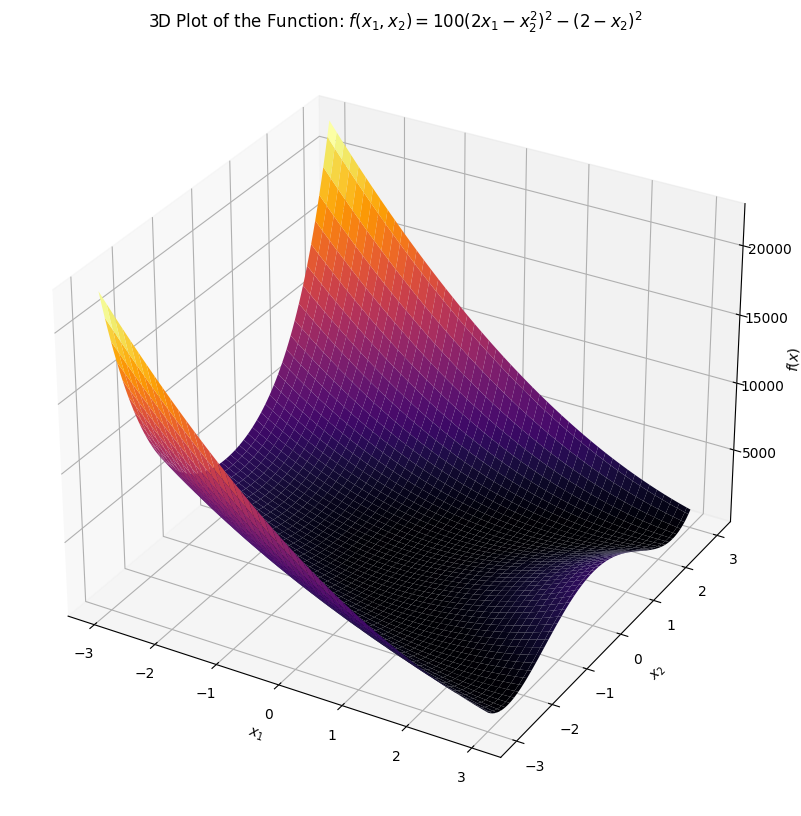

In [ ]:
# Generate data for plotting
x1 = np.linspace(-3, 3, 100)
x2 = np.linspace(-3, 3, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = f([X1, X2])

# Create 3D plot
fig = plt.figure(figsize=(25, 10))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X1, X2, Z, cmap='inferno')

# Set labels and title
ax.set_xlabel('$x_{1}$')
ax.set_ylabel('$x_{2}$')
ax.set_zlabel('$f(x)$')
ax.set_title(r'3D Plot of the Function: $f(x_{1},x_{2}) = 100(2x_{1} - x_{2}^{2})^{2} - (2 - x_{2})^{2}$')

# Show plot
plt.show()


# VI. 2.) Program the steepest descent and Newton algorithms, and use them to find the minimizer of f.

#Method of Steepest Descent

Choices for Armijo's Condition

$\sigma = 1$,   $\beta \in (0,1);$ Choose $\beta = 0.5$, $c_{1} \in (0,1);$ Choose $c_{1} = 0.5;$

## SDM with Armijo's Rule

We need to satisfy the condition such that for inexact line search:

Consider a descent direction $d^{(k)}$. Let s > 0 and $c_{1} \in (0,1)$. Choose a steplength $\alpha^{(k)} = \beta^{(m_{k})} \cdot s$, where $m_{k}$ is the smallest nonnegative integer for which:

$f(x + \beta^{m} \cdot s \nabla f(x^{(k)}))$ $\leq$ $f(x^{(k)}) + c_{1}\beta^{m} \cdot s \nabla f(x^{(k)})^{T}d^{(k)}$

### Initial Point (2.4, 2,4)

Choices for Armijo's Condition for the initial point  $(x_{1}, x_{2})$ = (2.4, 2.4)

$\sigma = 1$,   $\beta \in (0,1);$ Choose $\beta = 0.5$, $c_{1} \in (0,1);$ Choose $c_{1} = 0.5;$

In [8]:
##Method of Steepest Descent Using Armijo's Condition


##initialize
x0 = np.array([2.4,2.4]); eps = 1e-6;

##For Armijo's Condition
beta = 0.5; s=1; c1=0.5;
max_iter = 3000
losses1 = []; soln1 = []; ##For Storing purposes only
iter = 0;
start_time1 = time.time()
for _ in range(max_iter):
  losses1.append(f(x0))
  soln1.append(x0);

  #Calculate the gradient of the objective function at the current iterate
  g = gradf(x0)

  #Backtracking line search with Armijo's Condition
  m = 0
  alpha = np.power(beta,m) * s
  while f(x0 - alpha * gradf(x0).T) > f(x0) - c1 * alpha * np.dot(gradf(x0).T, gradf(x0)):
    m = m + 1
    alpha = np.power(beta,m) * s

  #Steepest Descent Update
  x = x0 - alpha * g.T
  x0 = x;
  iter = iter + 1;

  #Stopping Criteria
  if np.linalg.norm(gradf(x0)) <= eps:
    break;
end_time1 = time.time()
xa1 = x; ##For recording Purposes
soln1 = np.array(soln1)

print("Approximate Solution is: x1 = ", x[0]," x2 =  ", x[1])
print("Approximate Value of the Objective Function is: f(x,y) = ", f(x))
print("Number of Iterations: ", iter)

Approximate Solution is: x1 =  2.000002162143919  x2 =   2.0000010805153243
Approximate Value of the Objective Function is: f(x,y) =  1.1680085945007793e-12
Number of Iterations:  2835


12


### Initial point (-2.4, 2)

Choices for Armijo's Condition for the initial point $(x_{1}, x_{2})$ = (-2.4, 2)

$\sigma = 1$,   $\beta \in (0,1);$ Choose $\beta = 0.4$, $c_{1} \in (0,1);$ Choose $c{1} = 0.4;$

In [ ]:
##Method of Steepest Descent Using Armijo's Condition


##initialize
x0 = np.array([-2.4,2]);

eps = 1e-6;

##For Armijo's Condition
beta = 0.4; s=1; c1=0.4;
max_iter = 3000
losses1 = []; soln1 = [];
iter = 0;
start_time2 = time.time()
for _ in range(max_iter):
  losses1.append(f(x0))
  soln1.append(x0);

  #Calculate the gradient of the objective function at the current iterate
  g = gradf(x0)

  #Backtracking line search with Armijo's Condition
  m = 0
  alpha = np.power(beta,m) * s
  while f(x0 - alpha * gradf(x0).T) > f(x0) - c1 * alpha * np.dot(gradf(x0).T, gradf(x0)):
    alpha = np.power(beta,m) * s
    m = m + 1

  #Steepest Descent Update
  x = x0 - alpha * g.T
  x0 = x;
  iter = iter + 1;

  #Stopping Criteria
  if np.linalg.norm(gradf(x0)) <= eps:
    break;
end_time2 = time.time()
xa2 = x;


print(r"Approximate Solution is: x1 = ", x0[0]," x2 =  ", x[1])
print("Approximate Value of the Objective Function is: f(x,y) = ", f(x0))
print("Number of Iterations: ", iter)

Approximate Solution is: x1 =  1.9984835703288004  x2 =   1.9992387542298666
Approximate Value of the Objective Function is: f(x,y) =  5.928220772173819e-07
Number of Iterations:  3000


## Diminishing Step Size

$\alpha_{k} \rightarrow 0$ and $\sum_{k=1}^{\infty} \alpha_{k} = \infty$. Suppose we take a Harmonic Sequence for our steplength suppose:
$$
\alpha_{k} = \frac{1}{k} \\
⟹ \alpha_{k} = \alpha_{k} \cdot \frac{1}{||\nabla f(x^{(k)}||}
$$

### Initial Point (2.4,2.4)

In [ ]:
##Method of Steepest Descent Using Diminishing Step Size

##initialize
x0 = np.array([2.4,2.4]); eps = 1e-6;

##For Diminishing Step Size Condition
iter_thres = 5 ; iter_time = -iter_thres - 1
M = int(1e+8)


max_iter = 3000
losses2 = []; soln2 = [];
iter = 0;
start_time3 = time.time()
for i in range(max_iter):
  losses2.append(f(x0))
  soln2.append(x0);
  #Calculate the gradient of the objective function at the current iterate
  g = gradf(x0)

  #Diminishing Stepsize
  alpha = (1 / (i + 1))  # Harmonic sequence step size
  alpha = alpha / np.linalg.norm(gradf(x0))

  #Steepest Descent Update
  x = x0 - alpha * g.T
  x0 = x;
  iter = iter + 1;


  #Stopping Criteria
  if np.linalg.norm(gradf(x0)) <= eps:
    break;
end_time3 = time.time()
xd1 = x; #For recording purposes

print(r"Approximate Solution is: x1 = ", x[0]," x2 =  ", x[1])
print("Approximate Value of the Objective Function is: f(x,y) = ", f(x))
print("Number of Iterations: ", iter)




Approximate Solution is: x1 =  2.103343871040166  x2 =   2.051181633844318
Approximate Value of the Objective Function is: f(x,y) =  0.0026629025023232156
Number of Iterations:  3000


### Initial Point (-2.4,2)

In [ ]:
##Method of Steepest Descent Using Diminishing Step Size


##initialize
x0 = np.array([-2.4,2]); eps = 1e-6;


max_iter = 3000
losses2 = []; soln2 = [];
iter = 0;
start_time4 = time.time()
for i in range(max_iter):
  losses2.append(f(x0))
  soln2.append(x0);
  #Calculate the gradient of the objective function at the current iterate
  g = gradf(x0)

  #Diminishing Stepsize
  alpha = (1 / (i + 1))  # Harmonic sequence step size
  alpha = alpha / np.linalg.norm(gradf(x0))

  #Steepest Descent Update
  x = x0 - alpha * g.T
  x0 = x;
  iter = iter + 1;

  #Stopping Criteria
  if np.linalg.norm(gradf(x0)) <= 1e-6:
    break;
end_time4 = time.time()
xd2 = x; #For recoding purposes

print(r"Approximate Solution is: x1 = ", x[0]," x2 =  ", x[1])
print("Approximate Value of the Objective Function is: f(x,y) = ", f(x))
print("Number of Iterations: ", iter)

Approximate Solution is: x1 =  1.5068154428712133  x2 =   1.736313003963358
Approximate Value of the Objective Function is: f(x,y) =  0.06966353352143018
Number of Iterations:  3000


# Newton's Method

## NM with Armijo's Rule

### Initial Point (2.4, 2.4)

In [ ]:
##Newton's Method with Armijo's Rule

##For Armijo's Condition
beta = 0.5; s=1; c1=0.5;

##initialize
x0 = np.array([2.4,2.4]); eps = 1e-6;

max_iter = 3000
losses = []
iter = 0;
start_time7 = time.time()
for _ in range(max_iter):
  losses.append(f(x0))
  #Calculate the gradient of the objective function at the current iterate
  g = gradf(x0)
  ##Calculate the inverse of the Hessian of the objective Function
  hess = np.linalg.inv(hessianf(x0))
  d = hess @ g;
  #Backtracking line search with Armijo's Condition
  m = 0
  alpha = np.power(beta,m) * s
  while f(x0 - alpha * gradf(x0).T) > f(x0) - c1 * alpha * np.dot(gradf(x0).T, d):
    alpha = np.power(beta,m) * s
    m = m + 1
  #Newton's Method Descent Update
  x = x0 - alpha * d
  x0 = x;
  iter = iter + 1;

  #Stopping Criteria
  if np.linalg.norm(gradf(x0)) <= eps:
    break;
end_time7 = time.time()

xna1 = x;

print("Approximate Solution is: x1 = ", x[0]," x2 =  ", x[1])
print("Approximate Value of the Objective Function is: f(x,y) = ", f(x))
print("Number of Iterations: ", iter)

Approximate Solution is: x1 =  2.6521326790185453  x2 =   2.3976098312071676
Approximate Value of the Objective Function is: f(x,y) =  19.895458702065834
Number of Iterations:  3000


### Initial Point (-2.4, 2)

In [ ]:
##Newton's Method with Armijo's Rule

##For Armijo's Condition
beta = 0.5; s=1; c1=0.5;

##initialize
x0 = np.array([2.4,2.4]); eps = 1e-6;

max_iter = 3000
losses = []
iter = 0;
start_time0 = time.time()
for _ in range(max_iter):
  losses.append(f(x0))
  #Calculate the gradient of the objective function at the current iterate
  g = gradf(x0)
  ##Calculate the inverse of the Hessian of the objective Function
  hess = np.linalg.inv(hessianf(x0))
  d = hess @ g;
  #Backtracking line search with Armijo's Condition
  m = 0
  alpha = np.power(beta,m) * s
  while f(x0 - alpha * gradf(x0).T) > f(x0) - c1 * alpha * np.dot(gradf(x0).T, d):
    alpha = np.power(beta,m) * s
    m = m + 1
  #Newton's Method Descent Update
  x = x0 - alpha * d
  x0 = x;
  iter = iter + 1;

  #Stopping Criteria
  if np.linalg.norm(gradf(x0)) <= eps:
    break;
end_time0 = time.time()

xna2 = x;

print("Approximate Solution is: x1 = ", x[0]," x2 =  ", x[1])
print("Approximate Value of the Objective Function is: f(x,y) = ", f(x))
print("Number of Iterations: ", iter)

Approximate Solution is: x1 =  2.6521326790185453  x2 =   2.3976098312071676
Approximate Value of the Objective Function is: f(x,y) =  19.895458702065834
Number of Iterations:  3000


## NM with Diminishing Stepsize


A Similar method used for the diminishing step size in Steepest Descent:

$\alpha_{k} \rightarrow 0$ and $\sum_{k=1}^{\infty} a_{k} = \infty$ Suppose we take a Harmonic Sequence for our steplength:
$$
a_{k} = \frac{1}{k}
$$

### Initial Point (2.4,2.4)

In [ ]:
##Newton's Method with Diminishing Steplength

##initialize
x0 = np.array([2.4,2.4]); eps = 1e-6;

max_iter = 3000
losses = []
iter = 0;
start_time9 = time.time()
for i in range(max_iter):
  losses.append(f(x0))
  #Calculate the gradient of the objective function at the current iterate
  g = gradf(x0)
  ##Calculate the inverse of the Hessian of the objective Function
  hess = np.linalg.inv(hessianf(x0))
  d = hess @ g;

  #Diminishing Stepsize
  alpha = (1 / (i + 1))  # Harmonic sequence step size

  #Newton's Method Descent Update
  x = x0 - alpha * d
  x0 = x;
  iter = iter + 1;

  #Stopping Criteria
  if np.linalg.norm(gradf(x0)) <= eps:
    break;
end_time9 = time.time()

xnd1 = x;

print("Approximate Solution is: x1 = ", x[0]," x2 =  ", x[1])
print("Approximate Value of the Objective Function is: f(x,y) = ", f(x))
print("Number of Iterations: ", iter)

Approximate Solution is: x1 =  2.0026474896857414  x2 =   2.0013305891357054
Approximate Value of the Objective Function is: f(x,y) =  1.8554259327431222e-06
Number of Iterations:  3000


### Initial Point (-2.4,2)

In [ ]:
##Newton's Method with Diminishing Steplength

##initialize
x0 = np.array([-2.4,2]); eps = 1e-6;

max_iter = 3000
losses = []
iter = 0;
start_time10 = time.time()
for i in range(max_iter):
  losses.append(f(x0))
  #Calculate the gradient of the objective function at the current iterate
  g = gradf(x0)
  ##Calculate the inverse of the Hessian of the objective Function
  hess = np.linalg.inv(hessianf(x0))
  d = hess @ g;

  #Diminishing Stepsize
  alpha = (1 / (i + 1))  # Harmonic sequence step size

  #Newton's Method Descent Update
  x = x0 - alpha * d
  x0 = x;
  iter = iter + 1;

  #Stopping Criteria
  if np.linalg.norm(gradf(x0)) <= eps:
    break;
end_time10 = time.time()

xnd2 = x;

print("Approximate Solution is: x1 = ", x[0]," x2 =  ", x[1])
print("Approximate Value of the Objective Function is: f(x,y) = ", f(x))
print("Number of Iterations: ", iter)

Approximate Solution is: x1 =  2.0000000000000013  x2 =   2.0
Approximate Value of the Objective Function is: f(x,y) =  7.099748146989106e-28
Number of Iterations:  1


# Table of Results (VI. 2.)

## Table for initial point at $(2.4, 2.4)$

In [ ]:
xtrue = np.array([2,2]);

#Initial point (2.4, 2.4)
error1 = np.abs(xa1 - xtrue)
error2 = np.abs(xd1 - xtrue)
error4 = np.abs(xna1 - xtrue)
error5 = np.abs(xnd1 - xtrue)

time1 = end_time1 - start_time1
time3 = end_time3 - start_time3
time7 = end_time7 - start_time7
time9 = end_time9 - start_time9


# Create DataFrame
data = {
    "Method": ['SDM with Armijo', 'SDM with Diminishing Stepsize', 'NM with Armijo', 'NM with Diminishing Stepsize'],
    "|approximate solution - true solution|": [error1, error2, error4, error5],
    "Running Time (seconds)": [time1, time3, time7, time9]
}


# Create DataFrame with specified row names and column name
df1 = pd.DataFrame(data, index=None); df1.reset_index(drop=True, inplace=True);
# Display DataFrame with borders
styled_df1 = df1.style.set_table_styles([{
    'selector': '',
    'props': [
        ('border', '1px solid black')
    ]
}])

styled_df1

,Method,|approximate solution - true solution|,Running Time (seconds)
0,SDM with Armijo,[2.16214392e-06 1.08051532e-06],0.616092
1,SDM with Diminishing Stepsize,[0.10334387 0.05118163],0.054432
2,NM with Armijo,[0.65213268 0.39760983],1.219434
3,NM with Diminishing Stepsize,[0.00264749 0.00133059],0.511145


## Table for initial point at $(-2.4, 2)$

In [ ]:
xtrue = np.array([2,2]);

#Initial point (-2.4, 2)
error4 = np.abs(xa2 - xtrue)
error5 = np.abs(xd2 - xtrue)
error7 = np.abs(xna2 - xtrue)
error8 = np.abs(xnd2 - xtrue)

time2 = end_time2 - start_time2
time4 = end_time4 - start_time4
time0 = end_time0 - start_time0
time10 = end_time10 - start_time10




# Create DataFrame
data1 = {
    "Method": ['SDM with Armijo', 'SDM with Diminishing Stepsize', 'NM with Armijo', 'NM with Diminishing Stepsize'],
    "|approximate solution - true solution|": [error4, error5, error7, error8],
    "Running Time": [time2, time4, time0, time10]
}


# Create DataFrame with specified row names and column name
df2 = pd.DataFrame(data1, index=None); df2.reset_index(drop=True, inplace=True);
# Display DataFrame with borders
styled_df2 = df2.style.set_table_styles([{
    'selector': '',
    'props': [
        ('border', '1px solid black')
    ]
}])

styled_df2

,Method,|approximate solution - true solution|,Running Time
0,SDM with Armijo,[0.00151643 0.00076125],0.523792
1,SDM with Diminishing Stepsize,[0.49318456 0.263687 ],0.059573
2,NM with Armijo,[0.65213268 0.39760983],1.244822
3,NM with Diminishing Stepsize,[1.33226763e-15 0.00000000e+00],0.001861


# VI. 3.) Which method pair gave the better result? Explain why.
The given objective function, just judging from its 3D plot, it has a nonconvex landspace.

Based on the two tables for the initial point $(-2.4,2)$. Newton's Method with Diminishing Steplength performed better.

The given objective function $f(x_{1}, x_{2})$ is also twice continuously differentiable. Newton's Method requires the calculation of the inverse of the Hessian since it's update is $d^{(k)}
 = [\nabla^{2} f(x^{(k)})]^{-1} \nabla f(x^{(k)})$ So at each iteration we have:


 $$
 x^{(k+1)} = x^{(k)} - \alpha_{k} d^{(k)}
 $$

Where $\alpha_{k} \rightarrow 0$ and $\sum_{k=1}^{\infty} a_{k} = \infty$

From the given objective function the hessian, $\nabla^{2} f(\mathbf{x})$ is a $2x2$ matrix, so if the Hessian of the objective function is nonsingular, positive definite and not ill-conditioned then the calculation of its inverse possible and not that computationally expensive.

Newton's Method uses second-order information (Hessian matrix, $\nabla^{2} f(\mathbf{x})$) about the function, which provides more information about the local curvature of the function compared to Steepest Descent, which relies only on first-order information (gradients, $\nabla f(\mathbf{x})$).



*   Diminishing step size ensures that as you approach the minimum, the step sizes become smaller, allowing for more precise convergence.
*   At the given initial point $(-2.4,2)$, $\textbf{Newton's Method with Diminishing Steplength or Stepsize}$ might have encountered a region where the function curvature allowed it to converge quickly with diminishing step sizes.

Next for the initial point $(2.4,2.4)$ Steepest Descent Method with Armijo's Rule performed better as well besides Classical Newton's Method.

*  Armijo's rule ensures that the step size in each iteration of Steepest Descent is chosen to guarantee sufficient decrease in the objective function value.
* Armijo's rule is a line search technique used to determine an appropriate step size in the descent direction.

For the initial point $(2.4, 2.4)$, $\textbf{Steepest Descent with Armijo's condition}$ might have found a descent direction that led to a significant reduction in the objective function value

For the case of Diminishing Step Size, it does not guarrantee convergence however for the given objective function, using it with Steepest Descent with initial points either $(2.4,2.4)$ or $(-2.4,2)$, it does converge approximately to an optimal solution with minimal error from true solution.

Also observe that Newton's Method with either Armijo's Rule Steplength performed worse and did not converge closely to the true solution.

Conclusion: In particular Newton's Method method should be faster than Steepest Descent. Newton's Method is often preferred over Steepest Descent when faster convergence is desired and the computational cost is not prohibitive. However, Steepest Descent may be preferred in situations where computational resources are limited or when dealing with ill-conditioned problems.

Remark: The given objective function is nonconvex, so it must the case that from different initial points each method have varying performances depending on the chosen parameters.
